In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
plotly.tools.set_credentials_file(username='vvr', api_key='Ker155UU70wk3Ccz6iyM')
import plotly.plotly as py
import plotly.graph_objs as go

color = sns.color_palette("husl", 8)

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


%matplotlib inline

import squarify

import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
#from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
import re


from scipy import sparse


In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.columns = ['time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'amount',
       'class']

In [6]:
data['class'].value_counts()

0    284315
1       492
Name: class, dtype: int64

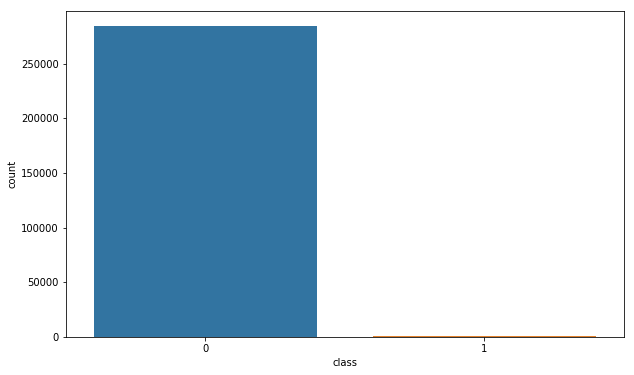

In [7]:
plt.figure(figsize = (10,6))
sns.countplot(data['class'])

In [8]:
data.columns

Index(['time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'amount',
       'class'],
      dtype='object')

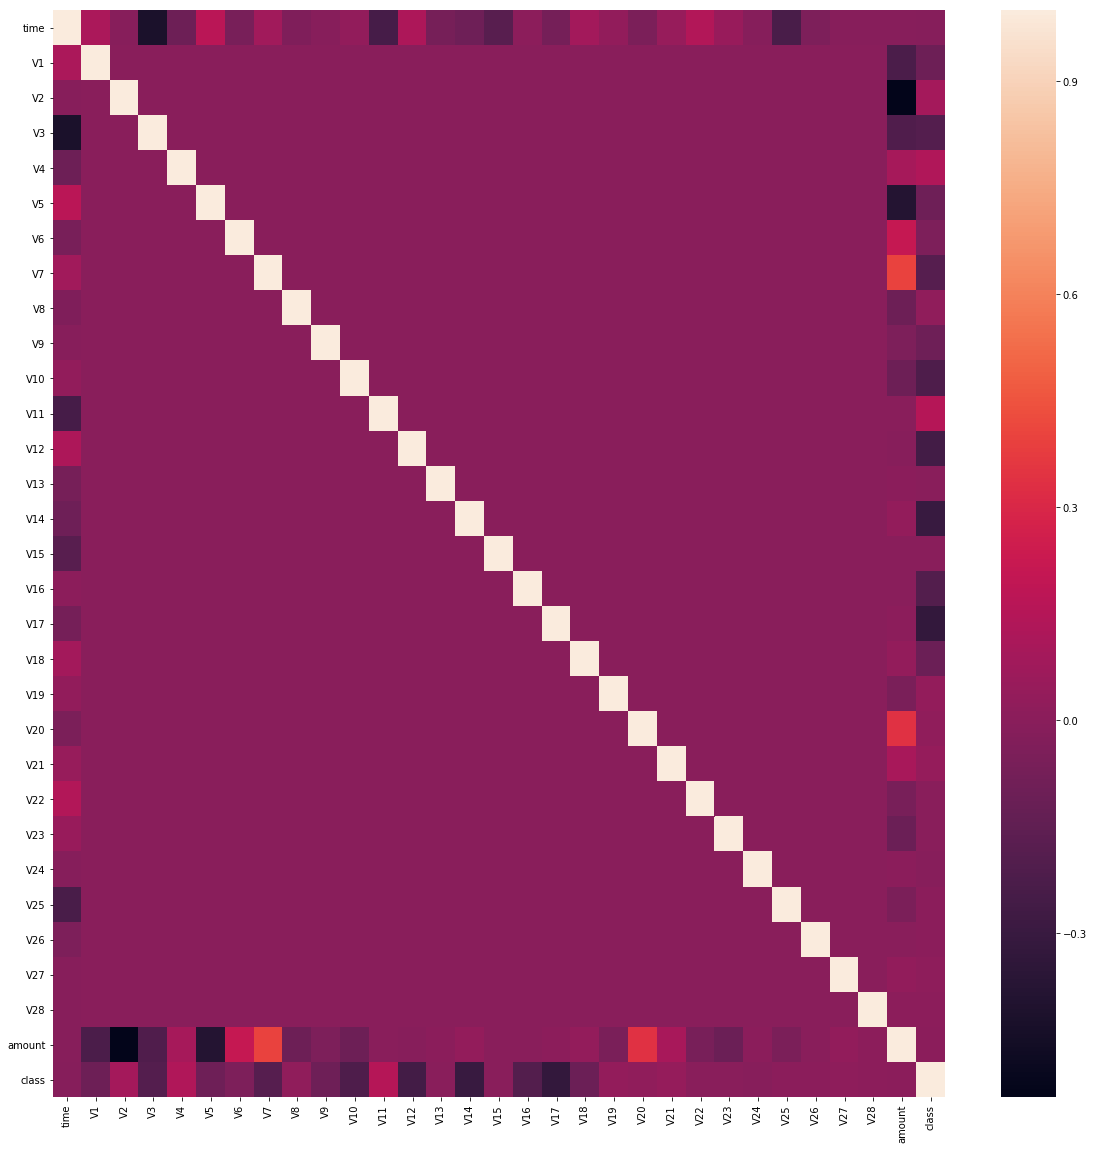

In [9]:
corr = data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr)

In [10]:
cor = data.groupby('class').mean()
cor.corr

<bound method DataFrame.corr of                time        V1        V2        V3        V4        V5  \
class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9     ...           V20       V21  \
class                                             ...                           
0      0.002419  0.009637 -0.000987  0.004467     ...     -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123     ...      0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           amount  
class        

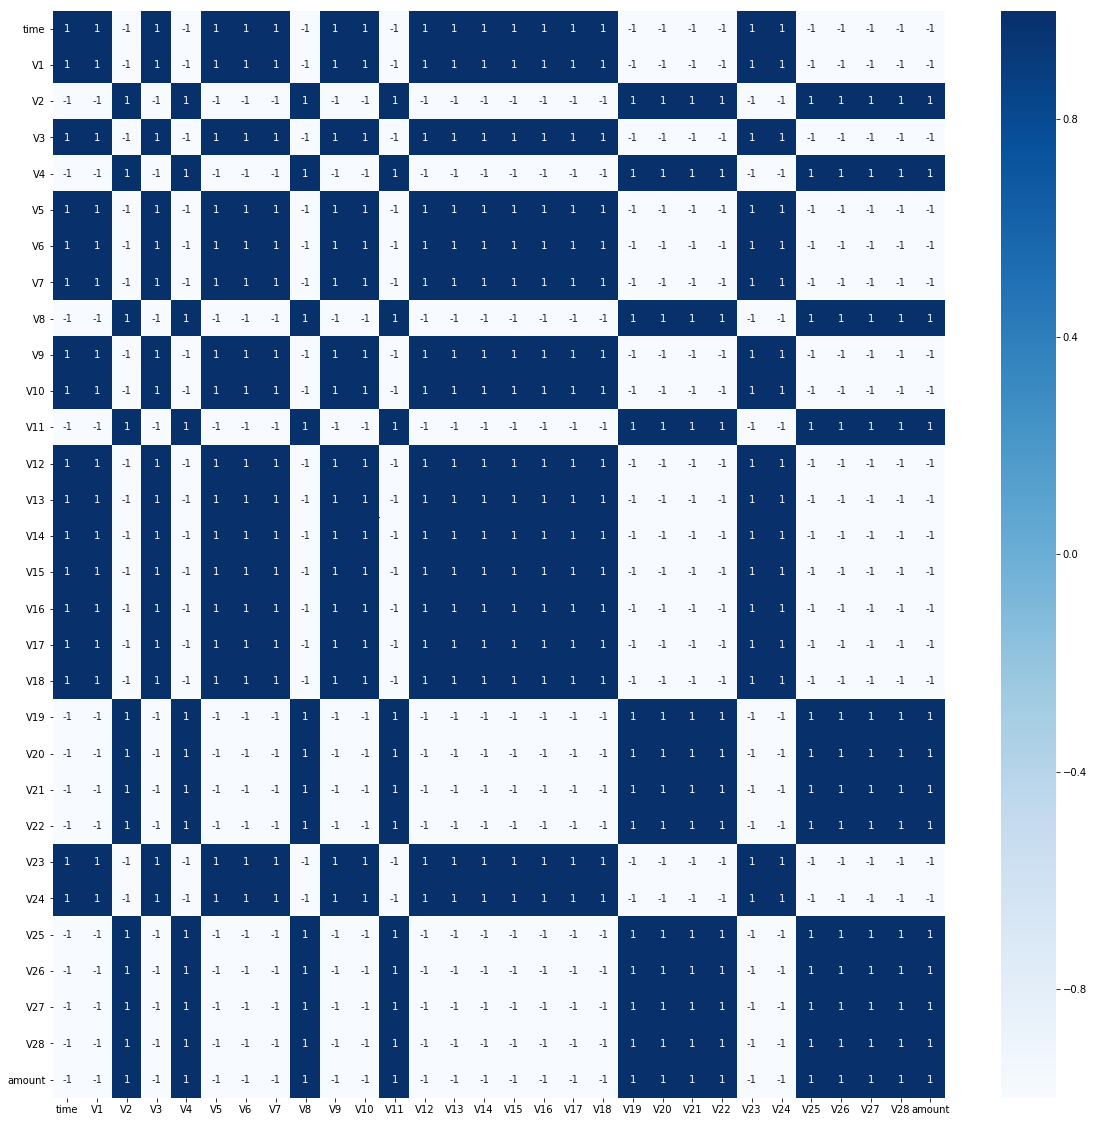

In [11]:
plt.figure(figsize = (20,20))
sns.heatmap(cor.corr(), annot = True, cmap="Blues")

In [12]:
data.columns

Index(['time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'amount',
       'class'],
      dtype='object')

In [13]:
data.head()

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
data.groupby(['time'])['class'].sum()

time
0.0         0
1.0         0
2.0         0
4.0         0
7.0         0
9.0         0
10.0        0
11.0        0
12.0        0
13.0        0
14.0        0
15.0        0
16.0        0
17.0        0
18.0        0
22.0        0
23.0        0
24.0        0
25.0        0
26.0        0
27.0        0
29.0        0
32.0        0
33.0        0
34.0        0
35.0        0
36.0        0
37.0        0
38.0        0
39.0        0
           ..
172750.0    0
172751.0    0
172754.0    0
172756.0    0
172757.0    0
172758.0    0
172759.0    0
172760.0    0
172761.0    0
172762.0    0
172764.0    0
172766.0    0
172767.0    0
172768.0    0
172769.0    0
172770.0    0
172771.0    0
172774.0    0
172775.0    0
172777.0    0
172778.0    0
172780.0    0
172782.0    0
172783.0    0
172784.0    0
172785.0    0
172786.0    0
172787.0    0
172788.0    0
172792.0    0
Name: class, Length: 124592, dtype: int64

In [15]:
data['time'].nunique()

124592

In [16]:
data['time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
128860.0    19
19912.0     19
3750.0      19
140347.0    19
143083.0    18
39897.0     17
3760.0      17
73885.0     17
3766.0      17
3749.0      17
156037.0    17
3755.0      16
3756.0      15
3754.0      15
3747.0      15
3771.0      15
19911.0     15
19913.0     15
142583.0    14
141741.0    14
19910.0     14
3748.0      14
3763.0      14
19914.0     14
3752.0      13
            ..
39342.0      1
28100.0      1
56199.0      1
85456.0      1
93615.0      1
23401.0      1
157387.0     1
39347.0      1
157403.0     1
93591.0      1
136658.0     1
157409.0     1
4919.0       1
119950.0     1
46797.0      1
120057.0     1
93595.0      1
27132.0      1
60029.0      1
93603.0      1
166848.0     1
80566.0      1
93598.0      1
93599.0      1
129204.0     1
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: time, Length: 124592, dtype: int64

In [17]:
data.columns

Index(['time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'amount',
       'class'],
      dtype='object')

In [18]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']] = scl.fit_transform(data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']])


In [19]:
data.head()

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,amount,class
0,0.0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,149.62,0
1,0.0,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,2.69,0
2,1.0,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,378.66,0
3,1.0,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,123.50,0
4,2.0,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,69.99,0


# Principle Component Analysis

In [20]:
X = data.drop('class', axis =1)
y = data['class'].copy()

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

pca.fit(X)

print(pca.explained_variance_ratio_) 

[9.99972263e-01 2.77374146e-05 2.95265649e-12 2.74786966e-12
 2.62283850e-12 2.02575191e-12 1.78796058e-12 1.71948804e-12
 1.53553396e-12 1.44199893e-12]


# Test Train Split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
'''
X_train = X_train.head(20)
y_train = y_train.head(20)
'''

'\nX_train = X_train.head(20)\ny_train = y_train.head(20)\n'

In [36]:
'''
X_test = X_test.head(10)
y_test  = y_test.head(10)
'''


'\nX_test = X_test.head(10)\ny_test  = y_test.head(10)\n'

# Machine Learning

# 1.Logestic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()


'\nX_train, y_train  = make_classification(n_samples=100000, n_features=20,\n                                    n_informative=2, n_redundant=10,\n                                    random_state=42)\n\nX_test, y_test  = make_classification(n_samples=100000, n_features=20,\n                                    n_informative=2, n_redundant=10,\n                                    random_state=42)\n'

In [39]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=10)
print(scores)

[0.99824454 0.99824446 0.99824446 0.99824446 0.99828827 0.99828827
 0.99828827 0.99828827 0.99828827 0.99828827]


In [41]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
clf.score(X_test, y_test)

0.9982795547909132